# Minkowski Maps

Compute the spatial representations volume, surface area, mean curvature, and Euler characteristic at each location for a given window size.

___

## Import packages

In [2]:
import dpm_tools as dpm
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

[17:27:03] ERROR    PARDISO solver not installed, run `pip install pypardiso`. Otherwise,          ]8;id=259427;file://C:\Users\bcc2459\AppData\Roaming\Python\Python312\site-packages\openpnm\utils\_workspace.py\_workspace.py]8;;\:]8;id=465348;file://C:\Users\bcc2459\AppData\Roaming\Python\Python312\site-packages\openpnm\utils\_workspace.py#56\56]8;;\
                    simulations will be slow. Apple M chips not supported.                                         

## Demonstration image

To demonstrate the Minkowski maps, we read in 3D binary image of a sphere pack sample with linearly varying grain sizes. The image is read in using the ``dpm_tools.io.read_image()`` function. 

(-0.5, 255.5, 255.5, -0.5)

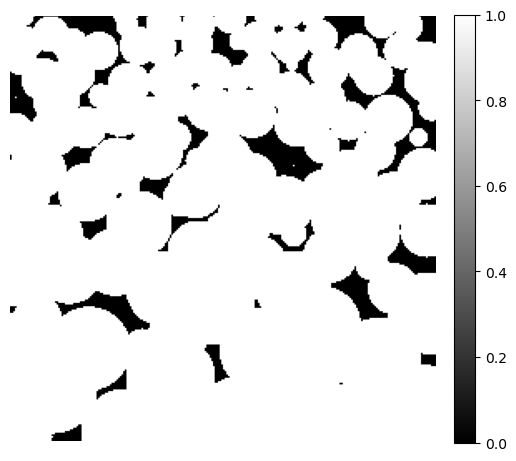

In [ ]:
porosity_gradient = dpm.io.read_image('../../../_static/374_06_00_256.mat')['bin']

fig, ax = plt.subplots(figsize=[6, 6])
im = ax.imshow(porosity_gradient[:, 50, :], cmap="binary_r")
fig.colorbar(im, fraction=0.046, pad=0.04)
ax.axis(False)


## Minkowski Maps

The method implemented here is adopted from [Jiang and Arns (2020)](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.101.033302). The basic idea is that 4 Minkowski functionals in 3D (3 Minkowski functionals in 2D) are computed for a given window size around each voxel.

The ``dpm_tools.metrics.minkowski_map`` function takes a 2D or 3D binary image (foreground voxels labeled 1, background voxels labeled 0) and a support size as input. The function contains a GPU backend for accelerated computation (using ``backend='cuda'``)

In [17]:
a = b = c = 16

vol_map, sa_map, curv_map, eul_map = dpm.metrics.minkowski_map(porosity_gradient, [c, a, b], backend='cpu')

Using pyFFTW for FFT


100%|██████████| 22/22 [04:03<00:00, 11.06s/it]


In [1]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
vol = ax[0].imshow(vol_map[:, 50, :],
             cmap='inferno')
plt.colorbar(vol, ax=ax[0], fraction=0.046, pad=0.04)
ax[0].axis('off')
ax[0].title('Volume')

sa = ax[1].imshow(sa_map[:, 50, :],
             cmap='inferno')
plt.colorbar(sa, ax=ax[1], fraction=0.046, pad=0.04)
ax[1].axis('off')
ax[0].title('Surface Area')

curv = ax[2].imshow(curv_map[:, 50, :],
             cmap='inferno')
plt.colorbar(curv, ax=ax[2], fraction=0.046, pad=0.04)
ax[2].axis('off')
ax[0].title('Mean Curvature')

ec = ax[3].imshow(eul_map[:, 50, :],
             cmap='inferno')
plt.colorbar(ec, ax=ax[3], fraction=0.046, pad=0.04)
ax[3].axis('off')
ax[0].title('Euler Characteristic')

NameError: name 'plt' is not defined